# Import library

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Database
from sklearn.datasets import load_iris

pd.options.display.max_rows = 10

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Introduction
**The main objective of the PCA is to analyze the data to identify patterns in order to reduce the dimensionality of the data with a minimum loss of information**. One possible application would be pattern recognition, where we want to reduce computational costs and parameter estimation error by reducing the dimensionality of our attribute space by extracting a subspace that describes our data "satisfactorily." **The dimensionality reduction becomes important when we have a number of attributes significantly larger than the number of training samples**.

We apply the PCA to design all of our data (without class labels) in a different subspace, looking for the axes with the maximum variance where the data is most distributed. The main question is: ** "What subspace does our data represent?" **.

** First, we calculate the eigenvectors (major components) of our data and organize them into a projection matrix. Each eigenvector * is associated with an eigenvalue * which can be interpreted as the "size" or "magnitude" of the corresponding eigenvector **. In general, we consider only the eigenvalues that have a significantly larger magnitude than the others and disregard the autopares (eigenvector eigenvalues) that we consider to be less informative.

If we observe that all eigenvalues have a similar magnitude, this may be a good indicator that our data is already in a * good * subspace. On the other hand, ** if some eigenvalues have a much greater magnitude than the others, we must choose their eigenvectors since they contain more information about the distribution of our data **. Likewise, eigenvalues close to zero are less informative and we should disregard them in building our subspace.

## PCA vs LDA
Both PCA and LDA (*Linear Discrimant Analysis*) are linear transformation methods. On the one hand, the PCA provides the directions (eigenvectors or major components) that maximizes the variance of the data, while the LDA targets the directions that maximize the separation (or discrimination) between different classes. Maximizing the variance in the case of PCA also means reducing the loss of information, which is represented by the sum of the projection distances of the data in the axes of the main components.

While the PCA designs the data in a different subspace, the LDA attempts to determine a suitable subspace to distinguish the patterns belonging to the different classes.

<img src="images/PCAvsLDA.png" width=600>

## Summarizing the PCA approach in 4 steps
In general, the application of PCA involves the following steps:
    
1. Standardization of data
2. Obtaining eigenvectors and eigenvalues through:
     - Covariance Matrix; or
     - Matrix of Correlation; or
     - *Singular Vector Decomposition*
3. Construction of the projection matrix W from the selected eigenvectors
4. Transformation of the original data X via W to obtain the subspace Y

For the following tutorial, we will be working with the famous “Iris” dataset that has been deposited on the UCI machine learning repository <a href = "https://archive.ics.uci.edu/ml/datasets/Iris"> (Iris Dataset)</a>
.

**Reference:** Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.
The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

1. Iris-setosa (n=50)
2. Iris-versicolor (n=50)
3. Iris-virginica (n=50)

The four features of the Iris dataset:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

<img src="images/Iris-dataset.png" width=600>

# Dataset

## Importing dataset

In [2]:
iris = load_iris()
print(iris.data.shape)
print(iris.target.shape)
print(iris.feature_names)
print(iris.target_names)

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
df['class'] = df['class'].map({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]})
df

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# split the data table into data X and class labels Y
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
print(x.shape, y.shape)

(150, 4) (150,)


## Data Analysis

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


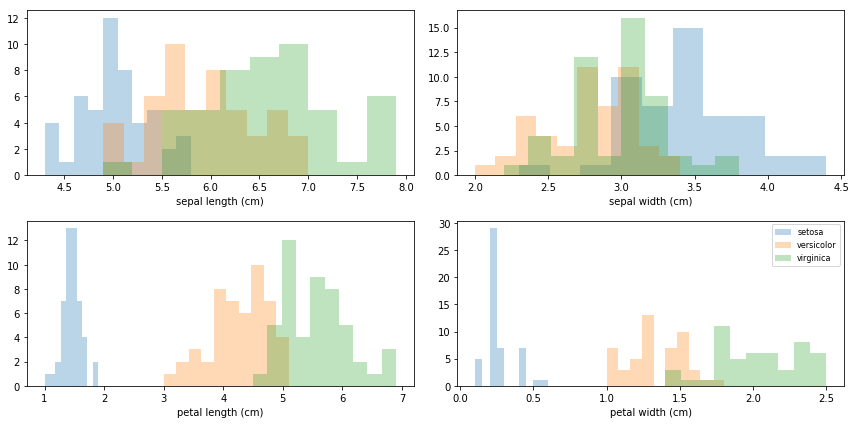

In [5]:
plt.figure(figsize=(12,6))
for f in range(4):
    plt.subplot(2, 2, f+1)
    for label in iris.target_names:
        plt.hist(x[y==label, f], label=label, bins=10, alpha=0.3)
        plt.xlabel(iris.feature_names[f])
plt.legend(loc='upper right', fancybox=True, fontsize=8)
plt.tight_layout()

### Data standardization
First, we will normalize the data to the normal distribution (mean = 0, standard deviation = 1) using the following formula (where each attribute is normalized individually):

$$std\_unit = \frac{x-\mu}{\sigma}$$

which can be used through the * StandardScaler * module:

In [6]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
print(x.shape)

(150, 4)


## Principal Component Analysis
### Eigenvectors and eigenvalues
The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the basis of the PCA: eigenvectors (main components) determine the direction of the new attribute space, and eigenvalues determine its magnitude. In other words, the eigenvalues explain the variance of the data along the new attribute axes.

### Covariance Matrix
The classical PCA approach calculates the covariance matrix, where each element represents the covariance between two attributes. The covariance between two attributes is calculated as follows:

$$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^N(x_{ij}-\overline{x}_j)(x_{ik}-\overline{x}_k)$$

That we can simplify in the vector form through the formula:

$$S=\frac{1}{n-1}((x-\overline{x})^T(x-\overline{x}))$$

where $ \overline{x}$ is a d-dimensional vector where each value represents the mean of each attribute, and $ n $ represents the number of attributes per sample. It is worth mentioning that x is a vector where each sample is organized in rows and each column represents an attribute. If you have a vector where the samples are organized into columns and each row represents an attribute, the transpose passes to the second element of the multiplication.

In [7]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0] - 1)
print(cov_mat, np.cov(x_std.T), sep='\n\n')

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In practice, the result of the covariance matrix basically represents the following structure:

$$\begin{bmatrix}var(1) & cov(1,2) & cov(1,3) & cov(1,4) 
\\ cov(1,2) & var(2) & cov(2,3) & cov(2,4)
\\ cov(1,3) & cov(2,3) & var(3) & cov(3,4)
\\ cov(1,4) & cov(2,4) & cov(3,4) & var(4)
\end{bmatrix}$$


285/5000
Where the main diagonal represents the variance in each dimension and the other elements are the covariance between each pair of dimensions.

In order to calculate the eigenvalues and eigenvectors, we only need to call the function *np.linalg.eig*, where each eigenvector is represented by a column.

In [8]:
eig_vals_cov, eig_vecs_cov = np.linalg.eig(cov_mat)
print('eigenvectors', eig_vecs_cov, sep='\n')
print('eigenvalues', eig_vals_cov, sep='\n')

eigenvectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
eigenvalues
[ 2.93808505  0.9201649   0.14774182  0.02085386]


An interesting property of the covariance matrix is that **the sum of the principal diagonal of the matrix (variance for each dimension) is equal to the sum of the eigenvalues**.

In [9]:
print(np.sum(np.diagonal(cov_mat)), np.sum(eig_vals_cov))

4.02684563758 4.02684563758


### Matrix of Correlation
Another way to calculate eigenvalues and eigenvectors is to use the correlation matrix. Although the matrices are different, they will result in the same eigenvalues and eigenvectors (shown later) since the correlation matrix is given by the normalization of the covariance matrix.

$$corr(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y}$$

To show this, let us first compute the correlation matrices for normalized and non-normalized data for normal distribution:

In [10]:
cor_mat1 = np.corrcoef(x_std.T)
cor_mat2 = np.corrcoef(x.T)
print(cor_mat1, cor_mat2, sep='\n\n')

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [11]:
eig_vals_cor, eig_vecs_cor = np.linalg.eig(cor_mat1)
print('eigenvectors', eig_vecs_cor, sep='\n')
print('eigenvalues', eig_vals_cor, sep='\n')

eigenvectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
eigenvalues
[ 2.91849782  0.91403047  0.14675688  0.02071484]


### Singular Vector Decomposition
Although the autodecomposition (calculation of eigenvectors and eigenvalues) made by the covariance or correlation matrix is more intuitive, most PCA implementations perform *Singular Vector Decomposition* (SVD) to improve computational performance. To calculate the SVD, we can use the numpy library:

In [12]:
eig_vecs_svd,s,v = np.linalg.svd(x_std.T)
print('eigenvectors', eig_vecs_svd, sep='\n')

eigenvectors
[[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]


Note that self-decoding results in the same eigenvalues and eigenvectors using any of the matrices below:

- Covariance matrix after data standardization
- Correlation matrix
- Correlation matrix after data standardization

### Verification of eigenvectors and eigenvalues
In order to verify that the eigenvectors and eigenvalues calculated in the autodecomposition are correct, we must verify if they satisfy the equation for each eigenvector and corresponding eigenvalue:

$$\Sigma \overrightarrow{v} = \lambda \overrightarrow{v}$$

where:
$$\Sigma = Matrix\,of\,Covariance$$
$$\overrightarrow{v} = eigenvectors$$
$$\lambda = eigenvalues$$

In [13]:
print("Verification for covariance matrix")
for i in range(len(eig_vecs_cov[0])):
    e_vec = eig_vecs_cov[:,i].reshape(1,4).T
    print(cov_mat.dot(e_vec).T, (eig_vals_cov[i] * e_vec).T, sep='\n', end='\n\n')
    
print("Verification for correlation matrix")
for i in range(len(eig_vecs_cor[0])):
    e_vec = eig_vecs_cor[:,i].reshape(1,4).T
    print(cor_mat1.dot(e_vec).T, (eig_vals_cor[i] * e_vec).T, sep='\n', end='\n\n') 

Verification for covariance matrix
[[ 1.53093597 -0.79136569  1.70530304  1.65959654]]
[[ 1.53093597 -0.79136569  1.70530304  1.65959654]]

[[-0.34728644 -0.84958426 -0.02253632 -0.06159767]]
[[-0.34728644 -0.84958426 -0.02253632 -0.06159767]]

[[-0.10631004  0.03610541  0.02099801  0.09370861]]
[[-0.10631004  0.03610541  0.02099801  0.09370861]]

[[ 0.00544883 -0.00257565 -0.01671331  0.01091902]]
[[ 0.00544883 -0.00257565 -0.01671331  0.01091902]]

Verification for correlation matrix
[[ 1.52072973 -0.78608992  1.69393435  1.64853257]]
[[ 1.52072973 -0.78608992  1.69393435  1.64853257]]

[[-0.3449712  -0.84392037 -0.02238608 -0.06118702]]
[[-0.3449712  -0.84392037 -0.02238608 -0.06118702]]

[[-0.10560131  0.03586471  0.02085802  0.09308389]]
[[-0.10560131  0.03586471  0.02085802  0.09308389]]

[[ 0.0054125  -0.00255848 -0.01660189  0.01084623]]
[[ 0.0054125  -0.00255848 -0.01660189  0.01084623]]



### Choice of eigenvectors and eigenvalues
As stated, the typical objective of PCA is to reduce the dimensionality of data by projection in a smaller subspace, where eigenvectors form the axes. However, the eigenvectors define only the directions of the new axes, since they all have size 1, which we can confirm by the following lines of code:

In [14]:
for ev in eig_vecs_cov:
    print(np.linalg.norm(ev), end=' ')

1.0 1.0 1.0 1.0 

Therefore, to decide which eigenvector (s) we can discard without losing much information in the construction of our subspace, we need to check the corresponding eigenvalues. ** The eigenvectors with the highest values are those that contain more information about the distribution of our data **. These are the eigenvectors we want.

To do this, we must sort the eigenvalues in descending order to choose the top k eigenvectors:

In [15]:
eig_pairs = [(np.abs(eig_vals_cov[i]), eig_vecs_cov[:,i]) for i in range(len(eig_vals_cov))]
eig_pairs.sort()
eig_pairs.reverse()

print("Eigenvalues in descending order and their respective eigenvectors:")
for ep in eig_pairs:
    print(ep)

Eigenvalues in descending order and their respective eigenvectors:
(2.93808505019999, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(0.92016490416248609, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(0.14774182104494735, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(0.020853862176462651, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


### Information Calculation
After sorting the eigenvalues, the next step is to ** define how many major components will be chosen for our new subspace **. To do this, we can use the * explained variance * method, which calculates how much information (variance) is assigned to each major component.

In [16]:
total = sum(eig_vals_cov)
var_exp = [(i / total)*100 for i in sorted(eig_vals_cov, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

for i in range(len(cum_var_exp)):
    print("The highest eigenvalue (s) contains {1: .2f}% of information".format(i+1, cum_var_exp[i]))

The highest eigenvalue (s) contains  72.96% of information
The highest eigenvalue (s) contains  95.81% of information
The highest eigenvalue (s) contains  99.48% of information
The highest eigenvalue (s) contains  100.00% of information


As we can see, most of the variance (72.77%) can be explained by the largest main component alone, while the second contains 23.03% of information. **Together, the first two major components contain 95.80% of all information**.

### Projection Matrix
In practice, the projection matrix is nothing more than the top k concatenated eigenvectors. So if we want to reduce our 4-dimensional space to a 2-dimensional space, we must choose the 2 eigenvectors with the 2 largest eigenvalues to construct our matrix W (d$\times$k).

In [17]:
w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print(w) # [DxK]

[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


### Projection in the new subspace
The last step of the PCA is to use our dimensional projection matrix W (4x2, where each column represents an eigenvector) to transform our samples into a new subspace. To do this, simply apply the following equation:

$$S = (X-\mu_X) \times W$$

Where each row in S contains the weights for each attribute (matrix column) in the new subspace.

In [18]:
s = (x_std-mean_vec).dot(w)
print(s.shape) # [NxK]

(150, 2)


As a matter of curiosity, note that if W represented all eigenvectors - not just the chosen ones - we could recompose each instance to X by the following formula:

$$X = (S \times W^{-1}) + \mu_X$$

Again, each line in S represents the weights for each attribute, only this time it would be possible to represent X by the sum of each eigenvector multiplied by a weight.

In the example below, let's consider only the first instance of x.

In [19]:
# projection of the first sample into x in the subspace represented by all eigenvectors
x0 = x_std[0,:]
w2 = eig_vecs_cov
s2 = (x0-mean_vec).dot(w2)
print(x0, w2, s2, sep='\n', end='\n\n')

# calculation of the first instance of x by subspace
x0_back = s2.dot(np.linalg.inv(w2))+mean_vec
print(x0_back)

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
[-2.26470281 -0.4800266  -0.12770602  0.0241682 ]

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]


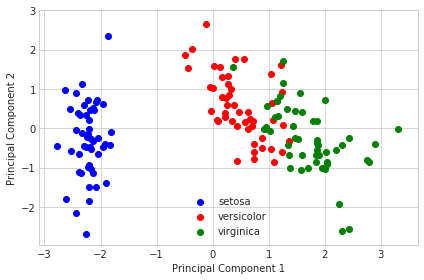

In [20]:
def showPCAReduction(s_matrix):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6,4))
        for label, color in zip(iris.target_names, ['blue', 'red', 'green']):
            plt.scatter(s_matrix[y==label, 0], s_matrix[y==label, 1], label=label, c=color)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='lower center')
        plt.tight_layout()
        plt.show()

showPCAReduction(s)

## PCA via scikit-learn
We can compare our results using the implementation present in the scikit-learn library.

In [21]:
from sklearn.decomposition import PCA as sklPCA
sklearn_pca = sklPCA(n_components=2)
y_sklearn = sklearn_pca.fit_transform(x_std)
print(y_sklearn.shape)

(150, 2)


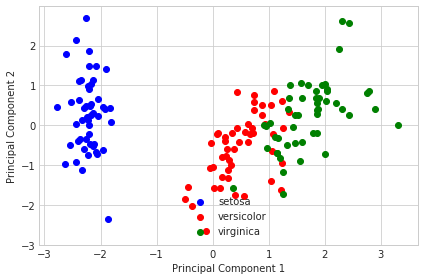

In [22]:
showPCAReduction(y_sklearn)

## General rules
- ** Always ** normalize the attributes before applying the PCA (StandarScaler);
- Remember to store the average for the round trip;
- ** No ** apply the PCA after other attribute selection algorithms;
- The number of major components you want to maintain should be chosen by analyzing the number of components and the accuracy of the system. ** Not always more main components result in better accuracy! **